# Visualizing MRI Data

Natural images are easily displayed in python using `imshow()`.  Some types of scientific imaging, create more complex data, such as the 3D volumetric data from MRI.  Python functions can be extended to display this data by stacking images together to describe the 3-dimensionality or addition of a `depth` (z or plane) to the traditional x (row) and y (column) data of 2D images.

## Table of Contents
1. Import packages and data
    * import packages
    * get data
2. Visualize data
    * read data
    * create visual
3. Build Slice Viewer

In [17]:
# useful packages for problem space
%matplotlib inline
import tempfile  # temporary dictionary for large dataset
import os # path manipulation
from urllib.request import urlretrieve #get data from url
import zipfile
import nibabel #reader for nifti files
import matplotlib.pyplot as plt  #plotting
import ipywidgets as widgets # making slice viewer
import shutil # clean up--remove temp dir

In [2]:
# loading the data
# create temp dir
d = tempfile.mkdtemp()

# Return the tail of the path
#os.path.basename('http://google.com/attention.zip')

# define path to data
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# retrieve data
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

# extract data from temp dir
zipfile.ZipFile(fn).extractall(path=d)

# look at the data
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

## Visualize Data

Above we can see that the data appears to consists of many hdr and img files.  Further investigation of the img file properties reveal that they are NIfTI format.  This file type can be read with the `nibabel` package.  

In [3]:
#read images
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# make plain array, without metadata
struct_arr = struct.get_fdata()

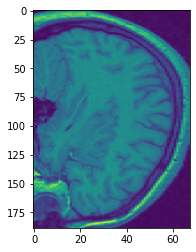

In [4]:
# use array to create visual
# call aspect to correct for unequal resolution along horiz/vert axis
plt.imshow(struct_arr[40], aspect = 0.5);

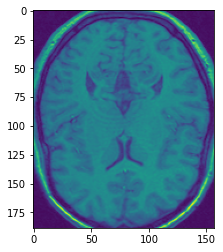

In [5]:
# view horizontal slices by transposing data
struct_arr_T = struct_arr.T
plt.imshow(struct_arr_T[30]);

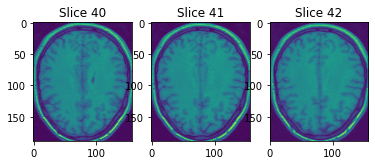

In [6]:
# view multiple horizontal slices side by side
fig, ax = plt.subplots(nrows=1, ncols=3)
# show sequential slices
ax[0].imshow(struct_arr_T[40])
ax[0].set_title('Slice 40')
ax[1].imshow(struct_arr_T[41])
ax[1].set_title('Slice 41')
ax[2].imshow(struct_arr_T[42])
ax[2].set_title('Slice 42');

## Build Slice Viewer

Above we can see multiple slices along the horizontal axis of our MRI dataset.  However, in order to fully explore the 3D dataset it would be good to see all the images displayed at once.  To do this the `ipywidgets` package can be used create an interactive slice viewer.

In [15]:
# make slider to control slice 
w = widgets.IntSlider(
    value=30,
    min=0,
    max=67,
    step=1,
    description='Slice Pos:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f');

def showslice(slc):
    plt.imshow(struct_arr[..., slc])


widgets.interactive(showslice, slc=w)

interactive(children=(IntSlider(value=30, description='Slice Pos:', max=67, readout_format='.1f'), Output()), …

## Summary 

Herein we have created an interactive 3D viewer for MRI images.  

Finally, we can remove our temporary data directory and document the package versions.  

In [16]:
# remove the temporary directory
shutil.rmtree(d)

In [19]:
## Watermark
%load_ext watermark
%watermark -v -a HGryk -m -p sys
%watermark -p os
%watermark -p tempfile
%watermark -p urlretrieve
%watermark -p nibabel
%watermark -p  matplotlib
%watermark -p  ipywidgets
%watermark -p  shutil

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: HGryk

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

sys: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 21 Model 2 Stepping 0, AuthenticAMD
CPU cores   : 8
Architecture: 64bit

os: unknown

tempfile: unknown

urlretrieve: not installed

nibabel: 3.2.1

matplotlib: 3.2.2

ipywidgets: 7.5.1

shutil: unknown

